In [1]:
import sofar as sf
import pyfar as pf
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

input_sofa_measured = Path("../assets") / "pp2_HRIRs_measured.sofa"
input_sofa_interpolated_mca = Path("../assets") / "pp2_HRIRs_interpolated_mca.sofa"
input_sofa_interpolated_sh = Path("../assets") / "pp2_HRIRs_measured_interpolated.sofa"

output_sofa_measured = Path("../assets") / "pp2_HRIRs_measured_time_aligned.sofa"
output_sofa_interpolated_sh = Path("../assets") / "pp2_HRIRs_interpolated_sh.sofa"
output_sofa_interpolated_mca = Path("../assets") / "pp2_HRIRs_interpolated_mca_time_aligned.sofa"

# read Sofa file

In [2]:
sofa_measured = sf.read_sofa(input_sofa_measured)
sofa_interpolated_sh = sf.read_sofa(input_sofa_interpolated_sh)
sofa_interpolated_mca = sf.read_sofa(input_sofa_interpolated_mca)

In [3]:
sofa_measured.inspect()

SimpleFreeFieldHRIR 1.0 (SOFA version 1.0)
-------------------------------------------
GLOBAL_Conventions : SOFA
GLOBAL_Version : 1.0
GLOBAL_SOFAConventions : SimpleFreeFieldHRIR
GLOBAL_SOFAConventionsVersion : 1.0
GLOBAL_APIName : ARI SOFA API for Matlab/Octave
GLOBAL_APIVersion : 1.0.3
GLOBAL_AuthorContact : fabian.brinkmann@mailbox.org; manoj.fma@gmail.com
GLOBAL_DataType : FIR
GLOBAL_License : cc-by 4.0 (https://creativecommons.org/licenses/by/4.0/)
GLOBAL_Organization : Audio Communication Group, Technical University Berlin; HUAWEI Munich Research Center; Sennheiser
GLOBAL_RoomType : free field
GLOBAL_DateCreated : 2018-09-17 15:28:15
GLOBAL_DateModified : 2018-10-23 16:06:34
GLOBAL_Title : head-related impulse responses
GLOBAL_DatabaseName : HUTUBS
GLOBAL_ListenerShortName : pp2
ListenerPosition : (I=1, C=3)
  [0. 0. 0.]
ListenerPosition_Type : cartesian
ListenerPosition_Units : metre
ReceiverPosition : (R=2, C=3, I=1)
  [[ 0.    0.75  0.  ]
   [ 0.   -0.75  0.  ]]
ReceiverPositi

In [4]:
sofa_interpolated_sh.inspect()

SimpleFreeFieldHRIR 1.0 (SOFA version 2.1)
-------------------------------------------
GLOBAL_Conventions : SOFA
GLOBAL_Version : 2.1
GLOBAL_SOFAConventions : SimpleFreeFieldHRIR
GLOBAL_SOFAConventionsVersion : 1.0
GLOBAL_APIName : sofar SOFA API for Python (pyfar.org)
GLOBAL_APIVersion : sofar v1.1.3 implementing SOFA standard AES69-2022 (SOFA conventions 2.1)
GLOBAL_ApplicationName : Python
GLOBAL_ApplicationVersion : 3.12.2 [CPython - Clang 14.0.6 ]
GLOBAL_AuthorContact : 
GLOBAL_Comment : 
GLOBAL_DataType : FIR
GLOBAL_History : 
GLOBAL_License : No license provided, ask the author for permission
GLOBAL_Organization : 
GLOBAL_References : 
GLOBAL_RoomType : free field
GLOBAL_Origin : 
GLOBAL_DateCreated : 2024-05-17 21:43:58
GLOBAL_DateModified : 2024-05-17 21:43:58
GLOBAL_Title : 
GLOBAL_DatabaseName : 
GLOBAL_ListenerShortName : 
ListenerPosition : (I=1, C=3)
  [0. 0. 0.]
ListenerPosition_Type : cartesian
ListenerPosition_Units : metre
ReceiverPosition : (R=2, C=3, I=1)
  [[ 0.   

In [5]:
sofa_interpolated_mca.inspect()

SimpleFreeFieldHRIR 1.0 (SOFA version 2.1)
-------------------------------------------
GLOBAL_Conventions : SOFA
GLOBAL_Version : 2.1
GLOBAL_SOFAConventions : SimpleFreeFieldHRIR
GLOBAL_SOFAConventionsVersion : 1.0
GLOBAL_APIName : SOFA Toolbox for Matlab/Octave
GLOBAL_APIVersion : 2.1.4
GLOBAL_AuthorContact : 
GLOBAL_DataType : FIR
GLOBAL_License : No license provided, ask the author for permission
GLOBAL_Organization : 
GLOBAL_RoomType : free field
GLOBAL_DateCreated : 2024-06-13 19:39:20
GLOBAL_DateModified : 2024-06-13 19:40:26
GLOBAL_Title : 
GLOBAL_DatabaseName : 
GLOBAL_ListenerShortName : 
ListenerPosition : (I=1, C=3)
  [0. 0. 0.]
ListenerPosition_Type : cartesian
ListenerPosition_Units : metre
ReceiverPosition : (R=2, C=3, I=1)
  [[ 0.      0.0825  0.    ]
   [ 0.     -0.0825  0.    ]]
ReceiverPosition_Type : cartesian
ReceiverPosition_Units : metre
SourcePosition : (M=2702, C=3)
SourcePosition_Type : spherical
SourcePosition_Units : degree, degree, metre
EmitterPosition : (E

In [6]:
for sofa in [sofa_measured, sofa_interpolated_sh, sofa_interpolated_mca]:
    start_times = []
    sussy_start_times = []
    for i, source in enumerate(sofa.Data_IR):
        for j, ir in enumerate(source):
            ir_signal = pf.Signal(ir, sampling_rate=sofa.Data_SamplingRate)
            start_time = pf.dsp.find_impulse_response_start(ir_signal)
            start_times.append(start_time)
            
    print(min(start_times), max(start_times), np.mean(start_times), np.std(start_times))
    
    shift_to = min(start_times)


7 47 27.1625 7.11334872712117
7 39 22.118350861149214 2.699348218402754
-1 47 26.614914877868245 7.296684577379632


In [7]:
for sofa in [sofa_measured, sofa_interpolated_sh, sofa_interpolated_mca]:
    print(len(sofa.Data_IR))

440
6561
2702


In [8]:
for sofa in [sofa_measured, sofa_interpolated_sh, sofa_interpolated_mca]:
    print(len(sofa.Data_IR[0]))

2
2
2


In [9]:
for sofa in [sofa_measured, sofa_interpolated_sh, sofa_interpolated_mca]:
    delay_times = []
    time_shifted_irs = []
    for i, source in enumerate(sofa.Data_IR):
        source_irs = []
        source_delays = []
        for j, ir in enumerate(source):
            ir_signal = pf.Signal(ir, sampling_rate=sofa.Data_SamplingRate)
            ir_start = pf.dsp.find_impulse_response_start(ir_signal)
            ir_delay = ir_start - shift_to
            pf.dsp.time_shift(ir_signal, -ir_delay)
            source_irs.append(np.squeeze(ir_signal.time))
            source_delays.append(ir_delay)
    
        delay_times.append(source_delays)
        time_shifted_irs.append(source_irs)

    print(sofa.Data_IR.shape)
    print(len(time_shifted_irs), len(time_shifted_irs[0]), len(time_shifted_irs[0][0]))
    sofa.Data_Delay = delay_times
    sofa.Data_IR = time_shifted_irs
    print(sofa.Data_IR.shape)

(440, 2, 256)
440 2 256
(440, 2, 256)
(6561, 2, 256)
6561 2 256
(6561, 2, 256)
(2702, 2, 256)
2702 2 256
(2702, 2, 256)


In [10]:
sf.write_sofa(output_sofa_measured, sofa_measured)
sf.write_sofa(output_sofa_interpolated_sh, sofa_interpolated_sh)
sf.write_sofa(output_sofa_interpolated_mca, sofa_interpolated_mca)

# Check Sofa file

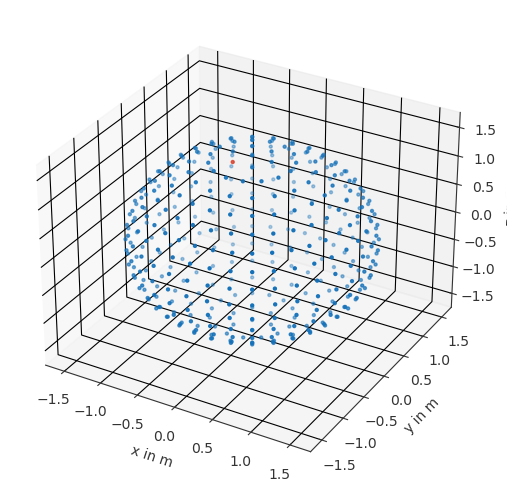

In [11]:
data_ir, source_coordinates, receiver_coordinates = pf.io.read_sofa(input_sofa_measured)

index, *_ = source_coordinates.find_nearest(pf.Coordinates.from_spherical_elevation(48.45952387, -4.9058849,   1.47   ))
source_coordinates.show(index)
plt.show()

In [12]:
data_ir, source_coordinates, receiver_coordinates = pf.io.read_sofa(output_sofa_measured)

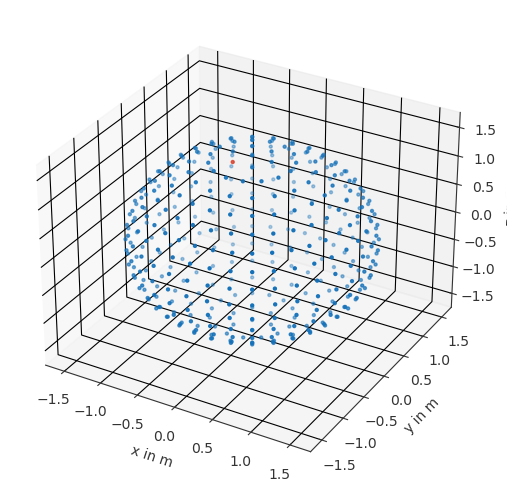

In [13]:
index, *_ = source_coordinates.find_nearest(pf.Coordinates.from_spherical_elevation(48.45952387, -4.9058849,   1.47   ))
source_coordinates.show(index)
plt.show()

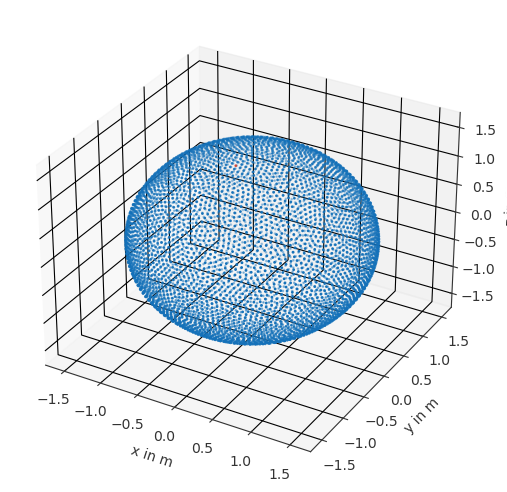

In [14]:
data_ir, source_coordinates, receiver_coordinates = pf.io.read_sofa(input_sofa_interpolated_sh)

index, *_ = source_coordinates.find_nearest(pf.Coordinates.from_spherical_elevation(48.45952387, -4.9058849,   1.47   ))
source_coordinates.show(index)
plt.show()

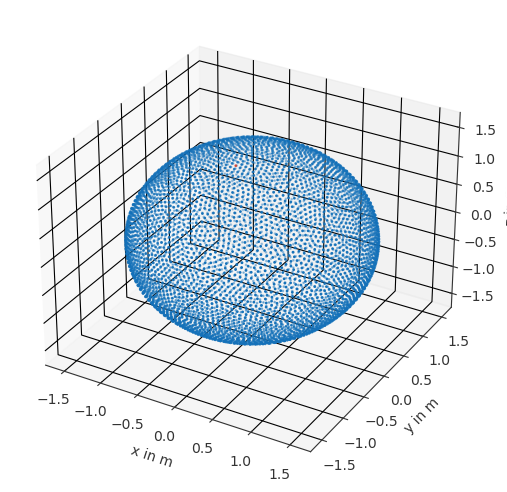

In [15]:
data_ir, source_coordinates, receiver_coordinates = pf.io.read_sofa(output_sofa_interpolated_sh)

index, *_ = source_coordinates.find_nearest(pf.Coordinates.from_spherical_elevation(48.45952387, -4.9058849,   1.47   ))
source_coordinates.show(index)
plt.show()

In [16]:
data_ir, source_coordinates, receiver_coordinates = pf.io.read_sofa(input_sofa_interpolated_mca)

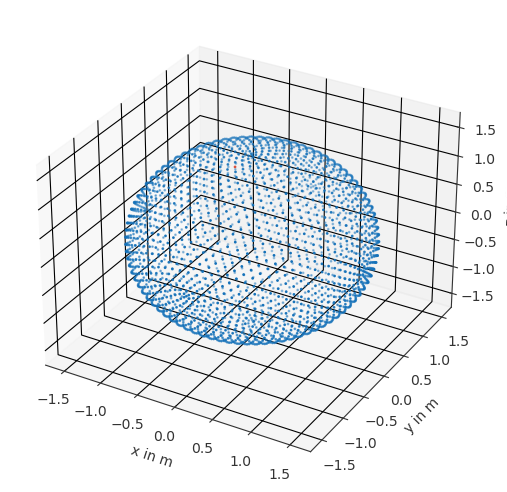

In [17]:
index, *_ = source_coordinates.find_nearest(pf.Coordinates.from_spherical_elevation(48.45952387, -4.9058849,   1.47   ))
source_coordinates.show(index)
plt.show()

In [18]:
data_ir, source_coordinates, receiver_coordinates = pf.io.read_sofa(output_sofa_interpolated_mca)

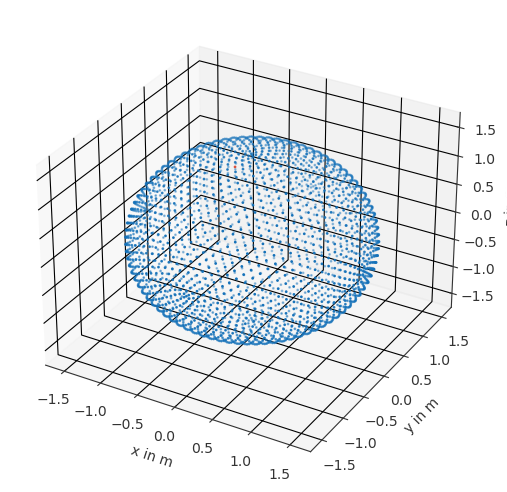

In [19]:
index, *_ = source_coordinates.find_nearest(pf.Coordinates.from_spherical_elevation(48.45952387, -4.9058849,   1.47   ))
source_coordinates.show(index)
plt.show()